**THE SPARK FOUNDATION**
### Author : Rachit Tyagi
# Task 1:  **Prediction Using Supervised ML**
**Objective : What will be predicted score if a student studies for 9.25 hrs/ day?**

In [ ]:
# Importing libraries required
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Reading data from the link in which data is stored
path = "http://bit.ly/w-data"
data = pd.read_csv(path)
print("Rachit u have Successfully Imported the Data")
data.head()


Rachit u have Successfully Imported the Data


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# **In order to get full Information i will use info()**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# **Finding out and Understanding Descriptive Statistics**

In [ ]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## **Find the missing Value if any**

In [ ]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

no missing values

In [ ]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


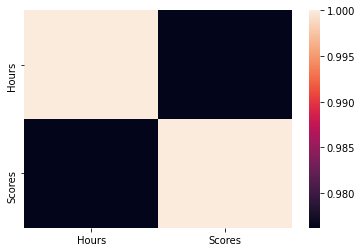

In [ ]:
sns.heatmap(data.corr())

# **Representing the Dataset Visually**

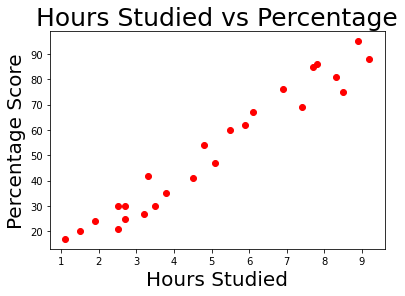

In [ ]:
# Representing the Scatter Plot
plt.xlabel('Hours Studied', fontsize=20)  
plt.ylabel('Percentage Score', fontsize = 20) 
plt.title('Hours Studied vs Percentage', fontsize = 25)
plt.scatter(data.Hours,data.Scores, color='red') 
plt.show()

**The above Scatter Plot shows the positive linear relation between the number of hours studied and the percentage of scores gained**

## **Preparing the data to analyse**

In [ ]:
# Divide data into labels (output) and attributes(input)
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [ ]:
# To split the data into training and test sets , we use Scikit - Learn'sbuilt-in train_test_split()
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 

## **Training the Algorithm**

In [ ]:
# Following Code is Implemented so as to train the algorithm
from sklearn.linear_model import LinearRegression  
reg = LinearRegression()  
reg.fit(X_train, y_train) 

print("Training of Algorithm completed")

Training of Algorithm completed


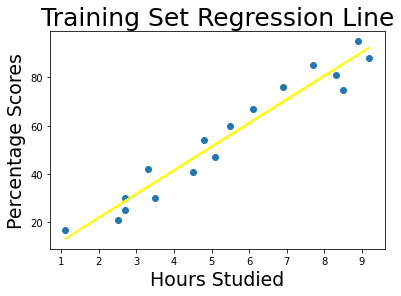

In [ ]:
#Plotting the Regression Line for training set
line = reg.coef_*X + reg.intercept_
plt.scatter(X_train, y_train)
plt.plot(X, line, color ='yellow')
plt.title('Training Set Regression Line', fontsize = 25)
plt.xlabel('Hours Studied' , fontsize=19)
plt.ylabel('Percentage Scores' , fontsize=19)
plt.show()

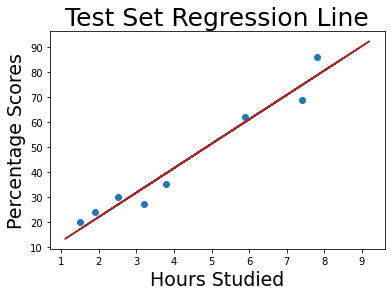

In [ ]:
# Plotting the Regression Line for test set
plt.scatter(X_test, y_test)
plt.plot(X, line, color ='brown')
plt.title('Test Set Regression Line', fontsize = 25)
plt.xlabel('Hours Studied' , fontsize=19)
plt.ylabel('Percentage Scores' , fontsize=19)
plt.show()

## **Making Predictions**

In [ ]:
# Testing data - In Hours
print(X_test)
# Predictions Scores
y_pred= reg.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


In [ ]:
# Comparing Actual Data vs Predicted Data
compare_scores = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
compare_scores

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


In [ ]:
# Fit Test
from sklearn import metrics
print("Accuracy of Actual and Predicted r-squared:-", metrics.r2_score(y_test, y_pred))

Accuracy of Actual and Predicted r-squared:- 0.9568211104435257


**This model can be good according to the result of fit test!**

**Evaluating the model**

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
MAE = np.sqrt(metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error : ", MSE)
print("Root Mean Squared Error : ", RMSE)
print("Mean Absolute Error : ", MAE)   

Mean Squared Error :  22.965097212700428
Root Mean Squared Error :  4.7921912746363144
Mean Absolute Error :  2.102314868907046


**Small value of Mean Absolute Error states that the probability of wrong prediction is very low**

**What will be predicted score if a student studies for 9.25 hrs/ day?**

In [ ]:
hours = [9.25]
result = reg.predict([hours])
print("Predicted score for 9.25 hours a day : {}".format(result[0],2))

Predicted score for 9.25 hours a day : 92.91505723477056


**Hence, using the Regression Model we've concluded that if a student studies for a 9.25 hours a day,then he/she is likely to score 92.91 marks**